In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tmpnn.models.regression import Regression
from tmpnn import regularizers as reg
from sklearn.linear_model import RidgeCV, Ridge, LassoLarsCV, LassoLars, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from lineartree import LinearBoostRegressor

In [3]:
df = pd.read_excel('Concrete_Data.xls')
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


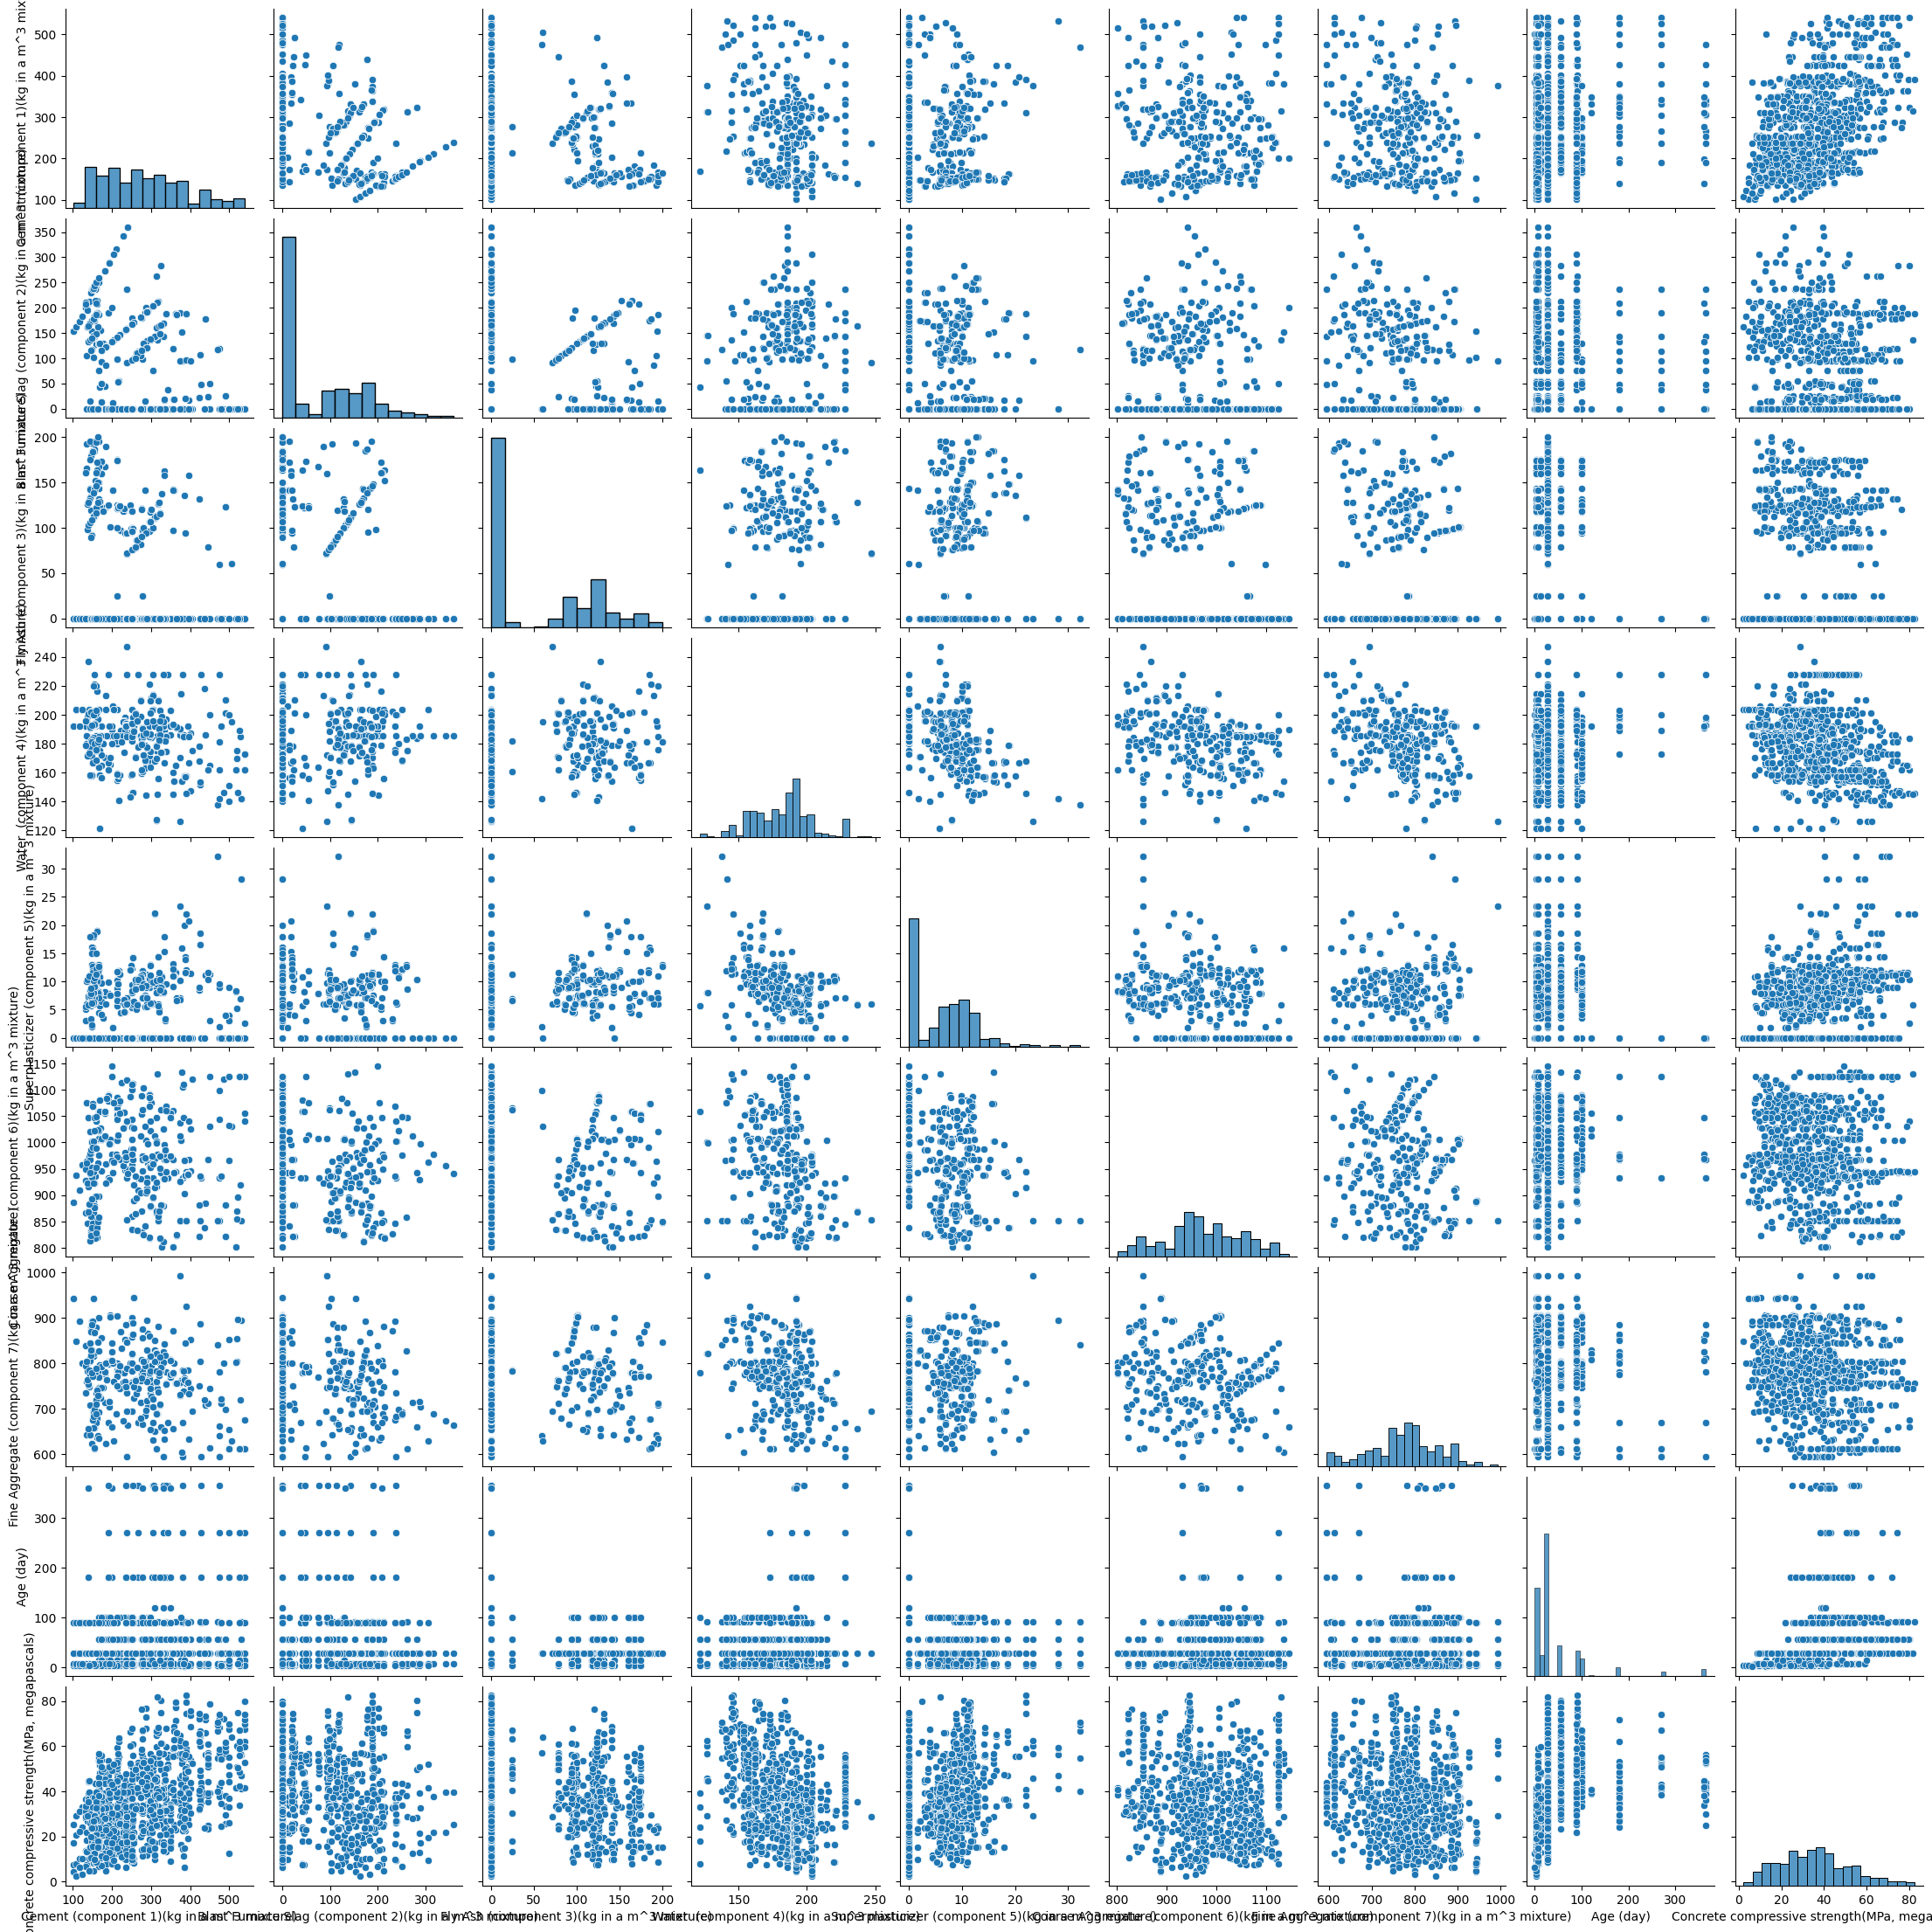

In [4]:
sns.pairplot(df)

In [290]:
X, Y = df.values[:,:-1], df.values[:,-1]
tr = (Y < 70) & (Y > 12)
X_tr, Y_tr = X[tr], Y[tr]
X_val, Y_val = X[~tr], Y[~tr]
print(int(Y_tr.size/Y.size*100),'%')

90 %


In [291]:
model = CatBoostRegressor()
model.fit(X_tr, Y_tr, eval_set=(X_val, Y_val),verbose=0)
r2_score(Y_val, model.predict(X_val))

0.9343682381493845

In [292]:
model = Pipeline(steps=[('ss',StandardScaler()),('pf',PolynomialFeatures(3)),('lr',LinearBoostRegressor(Ridge(5)))])
model.fit(X_tr, Y_tr)
r2_score(Y_val, model.predict(X_val))

0.9377966159301456

In [293]:
model = Pipeline(steps=[('ss',StandardScaler()),('pf',PolynomialFeatures(3)),('lr',Ridge(5))])
model.fit(X_tr, Y_tr)
r2_score(Y_val, model.predict(X_val))

0.9238720254358258

In [294]:
model = Pipeline(steps=[('s',MinMaxScaler()),('k',SVR(kernel='poly',degree=5))])
model.fit(X_tr, Y_tr)
r2_score(Y_val, model.predict(X_val))

0.8682853165716709

In [296]:
model = Regression(X.shape[1],1,3,6,regularizer=reg.L2(1e-6))
model.fit(X_tr, Y_tr, epochs=300, verbose=0)
r2_score(Y_val, model.predict(X_val))

4/4 [==============================] - 0s 1ms/step


0.9382031445114755